# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.628772e+01     1.492076e+01
 * time: 0.0017249584197998047
     1     3.583994e+01     8.962468e+00
 * time: 0.004411935806274414
     2     2.386751e+01     2.947542e+00
 * time: 0.010534048080444336
     3     2.278621e+01     5.803590e+00
 * time: 0.014846086502075195
     4     2.223646e+01     4.268296e+00
 * time: 0.019173145294189453
     5     2.165342e+01     3.646680e+00
 * time: 0.023725032806396484
     6     2.020309e+01     2.269620e+00
 * time: 0.029196977615356445
     7     1.939139e+01     1.620124e+00
 * time: 0.03471994400024414
     8     1.927294e+01     2.101462e+00
 * time: 0.0392460823059082
     9     1.881962e+01     1.552738e+00
 * time: 0.04381704330444336
    10     1.847366e+01     1.137410e+00
 * time: 0.07598209381103516
    11     1.819996e+01     8.195142e-01
 * time: 0.08009004592895508
    12     1.807381e+01     8.108342e-01
 * time: 0.08395504951477051
    13     1.801729e+01     1.056348e+00
 

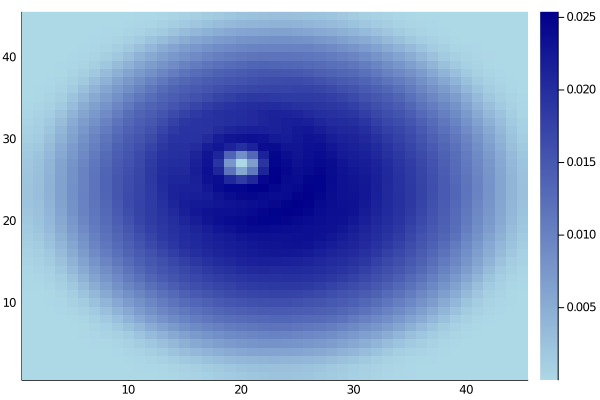

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)